<a href="https://colab.research.google.com/github/Akash276/AI-Solutions/blob/master/Customer_Churn__NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
      
        
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
dataset = pd.read_csv('/content/gdrive/My Drive/Intern_ML/Data_Sets/Q_4/Telco-Customer-Churn.csv')

In [ ]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
dataset.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [ ]:
#labels
lab = dataset["Churn"].value_counts().keys().tolist()
#values
val = dataset["Churn"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer attrition in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data, layout = layout)
configure_plotly_browser_state()
py.iplot(fig)

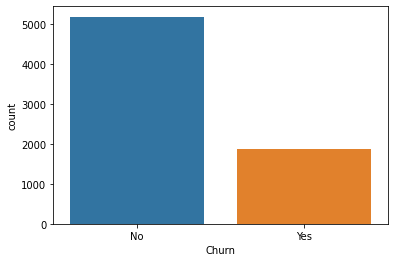

In [ ]:
sns.countplot(x= 'Churn', data = dataset)

In [ ]:
for i in range(len(dataset['TotalCharges'])):
    if dataset.iloc[i,19] == ' ':
        print(i)

488
753
936
1082
1340
3331
3826
4380
5218
6670
6754


In [ ]:
dataset['TotalCharges'] = dataset['TotalCharges'].replace(' ', np.nan)

dataset = dataset[dataset['TotalCharges'].notnull()]
dataset = dataset.reset_index()[dataset.columns]

dataset['TotalCharges'] = dataset['TotalCharges'].astype(float)

replace_columns = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies']

for i in replace_columns:
    dataset[i] = dataset[i].replace({'No internet service' : 'No'})
    
dataset['MultipleLines'] = dataset['MultipleLines'].replace({'No phone service' : 'No'})

In [ ]:
print ("Rows     : " ,dataset.shape[0])
print ("Columns  : " ,dataset.shape[1])
print ("\nFeatures : \n" ,dataset.columns.tolist())
print ("\nMissing values :  ", dataset.isnull().sum().values.sum())
print ("\nUnique values :  \n",dataset.nunique())


print(dataset['Contract'].unique())
print(dataset['PaymentMethod'].unique())
print(dataset['InternetService'].unique())

Rows     :  7032
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64
['Month-to-month' 'One year' 'Two year']
['Electro

In [ ]:
slice1 = dataset.iloc[:,1:8]
slice2 = dataset.iloc[:,9:15]
slice3 = dataset.iloc[:,16:17]
slice4 = dataset.iloc[:,18:]
result = pd.concat([slice1, slice2, slice3, slice4], axis = 1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

encode_columns = [ 'gender', 'Partner', 'Dependents','PhoneService','MultipleLines','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for i in encode_columns:
    result[i] = le.fit_transform(result[i])

churn = result.iloc[:,-1:]
result = result.iloc[:,:-1]


internet_service = dataset.iloc[:,8:9]
contract = dataset.iloc[:,-6:-5]
payment_method = dataset.iloc[:,-4:-3]
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
internet_service = ohe.fit_transform(internet_service).toarray()
contract = ohe.fit_transform(contract).toarray()
payment_method = ohe.fit_transform(payment_method).toarray()

In [ ]:
internet_service = pd.DataFrame(data = internet_service, index = range(len(internet_service)), columns = ['DSL','Fiber optic', 'No internet service'])
contract = pd.DataFrame(data = contract, index = range(len(contract)), columns = ['Month-to-month', 'One year', 'Two year'])
payment_method = pd.DataFrame(data = payment_method, index = range(len(payment_method)), columns = ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check'])

X = pd.concat([result, internet_service, contract, payment_method], axis = 1)
X = X.values
Y = churn.values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X, Y,test_size=0.20, random_state=0)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

In [ ]:
import keras

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout



classifier = Sequential(layers = None, name = None)

classifier.add(Dense(128, init = 'uniform', activation = 'tanh')) #giris katmani   #input dimm problem
classifier.add(Dense(256, init = 'uniform', activation = 'tanh'))   #gizli katman
classifier.add(Dense(512, init = 'uniform', activation = 'tanh'))
classifier.add(Dense(1024, init = 'uniform', activation = 'tanh'))
classifier.add(Dense(1, init ='uniform', activation = 'sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(128, activation="tanh", kernel_initializer="uniform")`

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(256, activation="tanh", kernel_initializer="uniform")`

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(512, activation="tanh", kernel_initializer="uniform")`

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(1024, activation="tanh", kernel_initializer="uniform")`

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`



In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

classifier = Sequential(layers = None, name = None)
classifier.add(Dense(128, init = 'uniform', activation = 'tanh'))
classifier.add(Dense(256, init = 'uniform', activation = 'tanh'))
classifier.add(Dense(512, init = 'uniform', activation = 'tanh'))
classifier.add(Dense(1024, init = 'uniform', activation = 'tanh'))
classifier.add(Dense(1, init ='uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(X_train, y_train, epochs = 50)

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
            
            
classifier.fit(X_train, y_train, epochs = 50)


y_pred = classifier.predict(X_test, use_multiprocessing=True, max_queue_size=1)
y_pred = (y_pred > 0.5)

Epoch 1/50
6328/6328 [==============================] - 3s 462us/step - loss: 0.4472 - accuracy: 0.7841
Epoch 2/50
6328/6328 [==============================] - 3s 426us/step - loss: 0.4331 - accuracy: 0.7925
Epoch 3/50
6328/6328 [==============================] - 3s 424us/step - loss: 0.4277 - accuracy: 0.7993
Epoch 4/50
6328/6328 [==============================] - 3s 433us/step - loss: 0.4265 - accuracy: 0.7971
Epoch 5/50
6328/6328 [==============================] - 3s 416us/step - loss: 0.4289 - accuracy: 0.7969
Epoch 6/50
6328/6328 [==============================] - 3s 435us/step - loss: 0.4288 - accuracy: 0.7987
Epoch 7/50
6328/6328 [==============================] - 3s 426us/step - loss: 0.4256 - accuracy: 0.7993
Epoch 8/50
6328/6328 [==============================] - 3s 419us/step - loss: 0.4221 - accuracy: 0.8004
Epoch 9/50
6328/6328 [==============================] - 3s 429us/step - loss: 0.4256 - accuracy: 0.7998
Epoch 10/50
6328/6328 [==============================] - 3s 427u

Accuracy:  0.8053977272727273 

Confusion Matrix
 [[492  22]
 [115  75]]


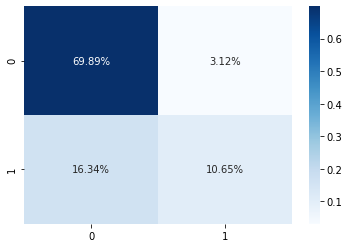

In [ ]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred), '\n')

cm = metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix\n', cm)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')